In [1]:
import torch
import numpy as np

np.set_printoptions(precision=3)

# creating a tensor from list or numpy array
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


### Creating a tensor
- torch.ones()
- torch.rand()

In [2]:
# one tensor
t_ones = torch.ones(2, 3)
t_ones.shape

# random tensor
rand_tensor = torch.rand(2, 3)
print(rand_tensor)
rand_tensor_2 = torch.rand((2, 3))
print(rand_tensor_2)

tensor([[0.0135, 0.8463, 0.7327],
        [0.4050, 0.0717, 0.1195]])
tensor([[0.9255, 0.0546, 0.2077],
        [0.1067, 0.1902, 0.1238]])


### Transposing, reshaping and squeezing
- torch.transpose(t, dim_1, dim_2)
- torch.reshape(t, size(dim_1, dim_2))
- torch.squeeze(t, dim)

In [3]:
# transpose a tensor
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
# print(t.shape, '--->', t_tr.shape)

# reshaping a tensor
t = torch.zeros(30)
t_reshap = torch.reshape(t, (5, 6))
t_res_tuple = t.reshape((5,6))
t_res_list = t.reshape(5, 6)
# print(t.shape)
# print(t_reshap.shape)
# print(t_res_tuple.shape)
# print(t_res_list.shape)

# squeezing a tensor
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying math operations to tensors
- torch.multiply(t1, t2)
- torch.matmul(t1, t2)
- torch.mean(t, dim)
- torch.std(t, dim)
- torch.linalg.norm(t, ord, dim)

In [4]:
# two random tensors, one from uniform dist, one from standard gaussian
torch.manual_seed(1)
t1 = 2 * torch.rand((5, 2)) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

# Element-wise product
t3 = torch.multiply(t1, t2)
# print(t3)

# mean/sum/std along a specified axis
# t4 = torch.mean(t1, axis=0)
t4 = torch.std(t2, axis=0)
# print(t4)

# matmul
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

# L^p norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)
# verify the results
np_norm = np.sqrt(np.sum(np.square(t1.numpy()), axis=1))
print(np_norm)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])
[0.678 0.508 1.116 0.549 0.185]


### Split, stack and concatenate tensors
- torch.chunk()
- torch.split()
- torch.cat([lst_tensors], axis)
- 

In [5]:
torch.manual_seed(1)
t = torch.rand(8)
print(t)

t_splits = torch.chunk(t, 3)
print(t_splits)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999, 0.3971, 0.7544])
(tensor([0.7576, 0.2793, 0.4031]), tensor([0.7347, 0.0293, 0.7999]), tensor([0.3971, 0.7544]))


In [6]:
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
print(t_splits)

tensor([0.5695, 0.4388, 0.6387, 0.5247, 0.6826])
(tensor([0.5695, 0.4388, 0.6387]), tensor([0.5247, 0.6826]))


In [7]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis=0)
print(C)

A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis=1)
print(C)


tensor([1., 1., 1., 0., 0.])
tensor([[1., 1., 1.],
        [0., 0., 0.]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building data input pipelines
- Dataset
- DataLoader

### Creating a pytorch DataLoader from existing tensors

In [8]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

# for item in data_loader:
#     print(item)

data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset
- A custom dataset must contain the following methods:
    - __init__()
    - __getitem__()

In [9]:
torch.manual_seed(1)
t_x = torch.rand((4, 3), dtype=torch.float32)
t_y = torch.arange(4)

from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [10]:
joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
    print('x: ', example[0], ' y: ', example[1])

x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


### Shuffle, batch and epochs

In [11]:
torch.manual_seed(1)

# Shuffle and load data
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}', 'x: ', batch[0], '\n y: ', batch[1])

batch 1 x:  tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y:  tensor([2, 0])
batch 2 x:  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y:  tensor([1, 3])


In [12]:
# load multiple epochs
for epoch in range(2):
    print(f'Epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n y:', batch[1])


Epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])
Epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y: tensor([0, 1])


### Creating dataset with files
- Module: PIL.Image
- Module: torchvision.transforms

In [13]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in
                    imgdir_path.glob('*.jpg')])
print(file_list)

[]


In [14]:
# Visualize images
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

In [15]:
# Extract label names
labels = [1 if 'dog' in
          os.path.basename(file) else 0
          for file in file_list]
print(labels)

[]


In [16]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        file = self.file_list[index]
        img = Image.open(file)
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
# image_dataset = ImageDataset(file_list, labels)

# for file, label in enumerate(image_dataset):
#     print(file, label)

#### Preprocessing, resizing

In [17]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

image_dataset = ImageDataset(file_list, labels, transform)

# Visualize
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

### Freely available datasets in pytorch
- torchvision.datasets contains datasets for images
- torchtext.datasets contains datasets for natural languages

#### Working with CelebA dataset

In [18]:
import torchvision
image_path = './Data/'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)

In [19]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [20]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x11C7F5CF0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


/var/folders/pg/qydlmtzs3bx2sy9z5fgl3s1r0000gn/T/ipykernel_47104/2367830562.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


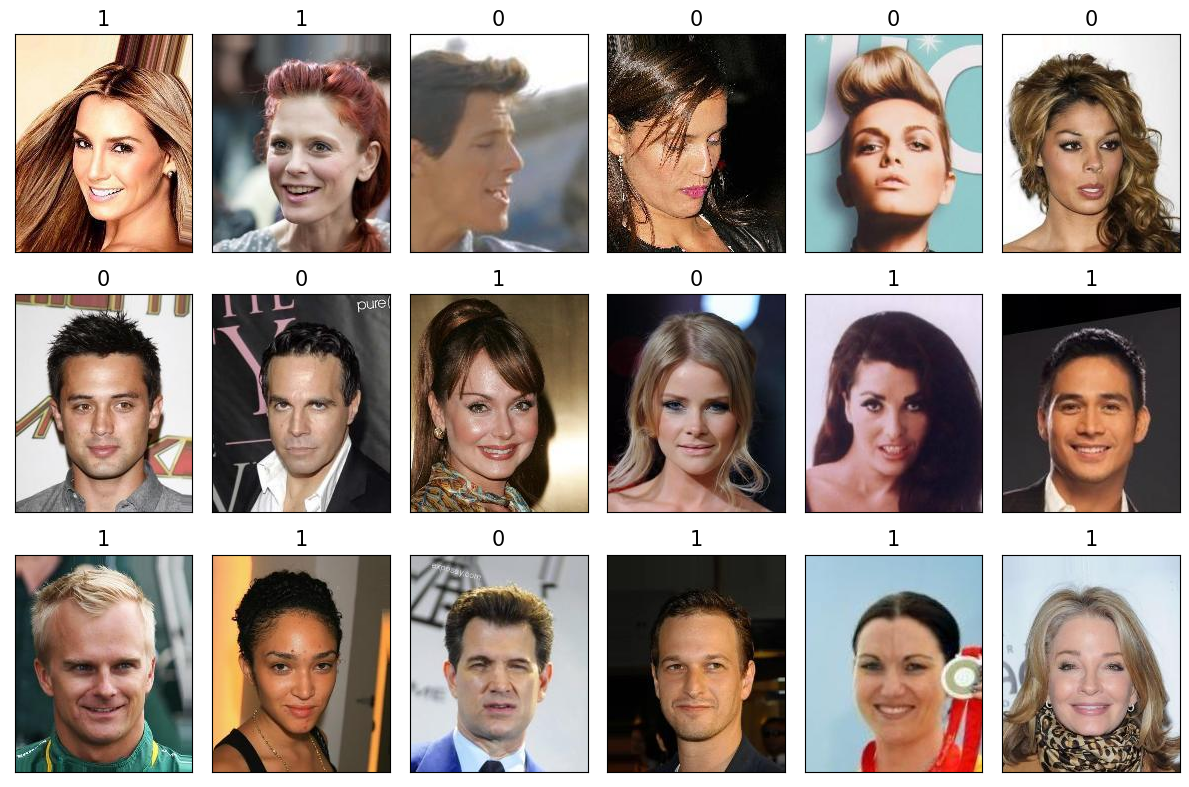

In [21]:
# Visualize first 18 samples
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

fig.tight_layout()
fig.show()

In [22]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

100.0%


Extracting ./Data/MNIST/raw/train-images-idx3-ubyte.gz to ./Data/MNIST/raw



100.0%


Extracting ./Data/MNIST/raw/train-labels-idx1-ubyte.gz to ./Data/MNIST/raw



100.0%


Extracting ./Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Data/MNIST/raw



100.0%

Extracting ./Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Data/MNIST/raw



In [23]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

In [24]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x14C4A4C10>, 5)


/var/folders/pg/qydlmtzs3bx2sy9z5fgl3s1r0000gn/T/ipykernel_47104/4174974087.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


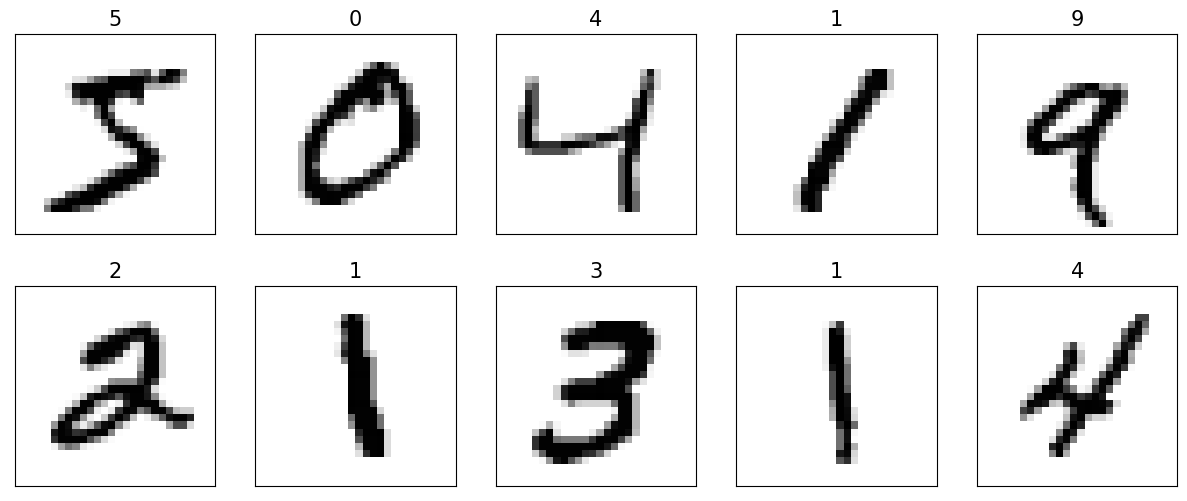

In [25]:
# Visualize first 10 samples
from itertools import islice
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

fig.show()

## Building an NN model in pytorch
- torch.nn
- torch.optim
- nn.Module

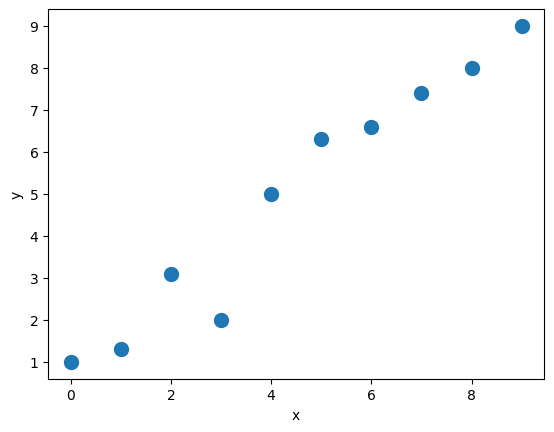

In [27]:
X_train = np.arange(10, dtype=np.float32).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype=np.float32)

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
# Building dataset
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [32]:
# Define a model from scratch
# Linear regression: z = w * x + b
# Parameters: weight, bias
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

# Define loss function
def loss_fn(input, target):
    return (input - target).pow(2).mean()

# Set hyperparameters
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')


Epoch 0 Loss 46.5720
Epoch 10 Loss 27.1502
Epoch 20 Loss 1.6446
Epoch 30 Loss 14.4571
Epoch 40 Loss 11.7827
Epoch 50 Loss 6.4122
Epoch 60 Loss 0.6339
Epoch 70 Loss 3.1562
Epoch 80 Loss 2.0100
Epoch 90 Loss 0.3107
Epoch 100 Loss 0.7625
Epoch 110 Loss 1.0024
Epoch 120 Loss 0.0232
Epoch 130 Loss 0.5138
Epoch 140 Loss 0.0741
Epoch 150 Loss 1.8712
Epoch 160 Loss 0.0007
Epoch 170 Loss 0.0850
Epoch 180 Loss 0.0634
Epoch 190 Loss 0.0012


In [33]:
print('Final parameters: ', weight.item(), bias.item())

Final parameters:  2.670930862426758 4.88258695602417


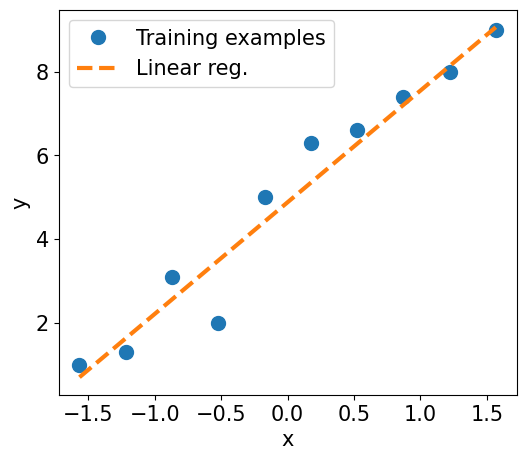

In [34]:
X_test = np.linspace(0, 9, num=100, dtype=np.float32).reshape((-1, 1))
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


In [35]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_sizse = 1
model = nn.Linear(input_size, output_sizse)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch ,y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6684
Epoch 10 Loss 29.1377
Epoch 20 Loss 20.9207
Epoch 30 Loss 0.1257
Epoch 40 Loss 12.4922
Epoch 50 Loss 1.7845
Epoch 60 Loss 7.6425
Epoch 70 Loss 2.5606
Epoch 80 Loss 0.0157
Epoch 90 Loss 0.7548
Epoch 100 Loss 0.8412
Epoch 110 Loss 0.4923
Epoch 120 Loss 0.0823
Epoch 130 Loss 0.0794
Epoch 140 Loss 0.0891
Epoch 150 Loss 0.0973
Epoch 160 Loss 0.1043
Epoch 170 Loss 0.1103
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0764


### Building 2-layer nn model for classifying flowers in the Iris dataset

In [16]:
# Loading the dataset
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

batch_size = 2
torch.manual_seed(1)

train_ds = TensorDataset(X_train_norm, y_train)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [17]:
# Building the model
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [18]:
# Setting hyperparameters
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
# Training the model
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

In [20]:
# Evaluating the model
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc: {accuracy:.4f}')

Test Acc: 0.9800


### Saving and reloading the trained model

In [21]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [22]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [23]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test acc: {accuracy:.4f}')

Test acc: 0.9800


In [24]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>